# part1-4 쿠버네티스 실습 4 - Deployment
# 1. Deployment 란?

- Deployment(디플로이먼트)는 Pod와 Replicaset에 대한 **관리**를 제공하는 단위입니다.
    - https://kubernetes.io/ko/docs/concepts/workloads/controllers/deployment/
- **관리**라는 의미는 Self-healing, Scaling, Rollout(무중단 업데이트) 과 같은 기능을 포함합니다.
- 조금 어렵다면 Deployment 는 Pod을 감싼 개념이라고 생각할 수 있습니다.
    - Pod 을 Deployment 로 배포함으로써 여러 개로 복제된 Pod, 여러 버전의 Pod 을 안전하게 관리할 수 있습니다.
- Deployment 의 자세한 구조는 생략하겠습니다.

---

# 2. Deployment 생성

- 간단한 Deployment 의 예시입니다.

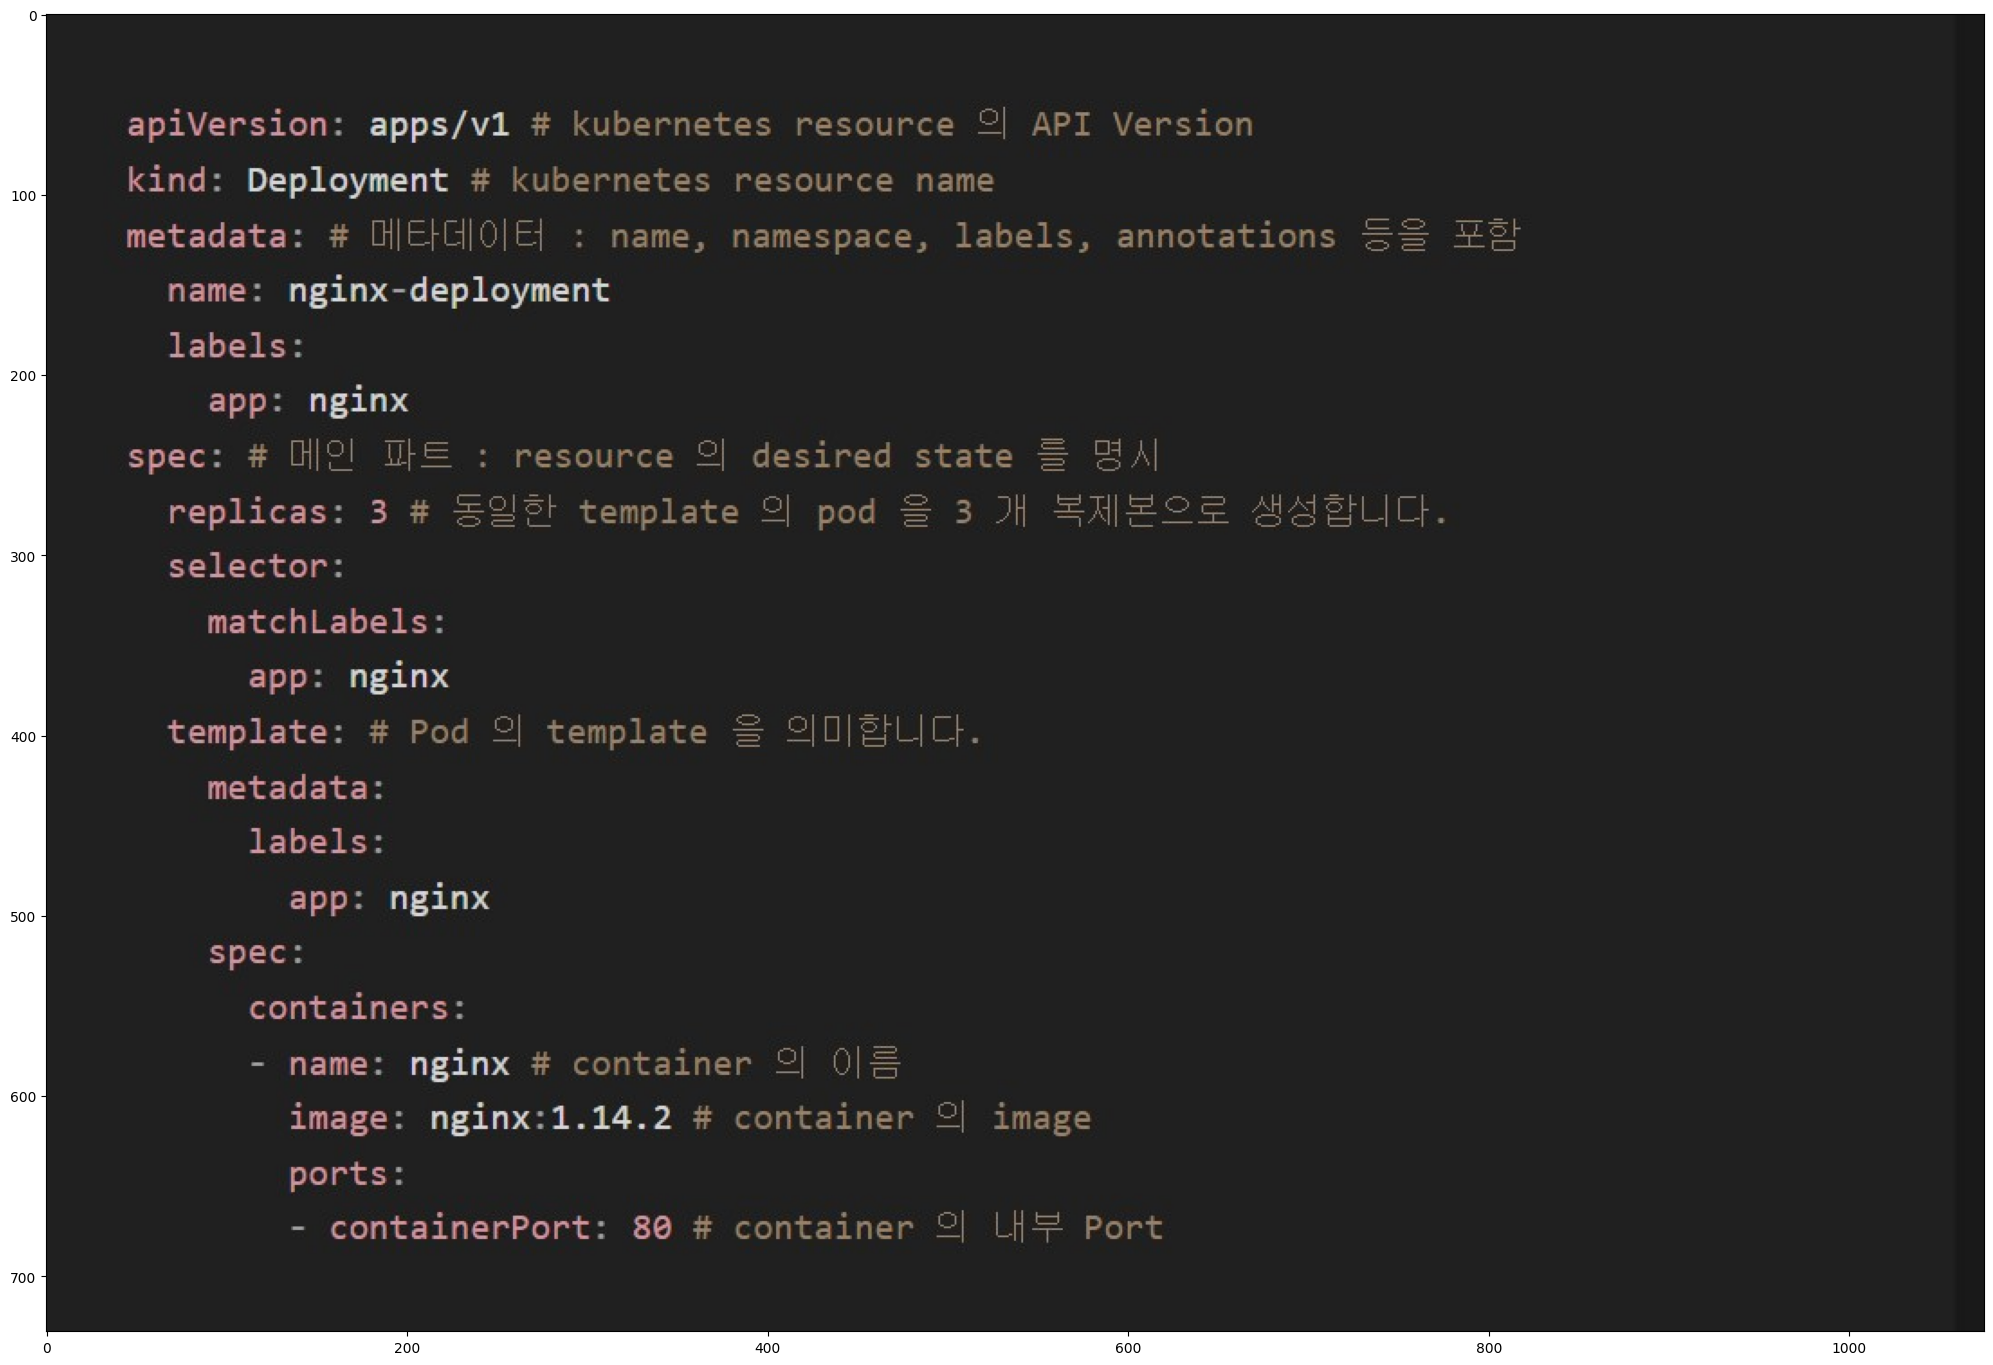

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

def display(start, end):
    for i in range(end+1):
        if i > start-1:
            GAP = cv2.imread(f'yaml{i}.jpg')
            GAP = cv2.cvtColor(GAP, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(25,25))
            plt.imshow(GAP)
            plt.show()

display(start=6, end=6)

In [4]:
# vi deployment.yaml
# # 위의 내용을 복사 후 붙여넣습니다.
!minikube start --driver=docker
!kubectl apply -f deployment.yaml

😄  minikube v1.22.0 on Ubuntu 20.04 (amd64)
✨  Using the docker driver based on existing profile
👍  Starting control plane node minikube in cluster minikube
🚜  Pulling base image ...
🏃  Updating the running docker "minikube" container ...
🐳  Preparing Kubernetes v1.21.2 on Docker 20.10.7 ...
🔎  Verifying Kubernetes components...
    ▪ Using image gcr.io/k8s-minikube/storage-provisioner:v5
🌟  Enabled addons: storage-provisioner, default-storageclass
🏄  Done! kubectl is now configured to use "minikube" cluster and "default" namespace by default
deployment.apps/nginx-deployment unchanged


# 3. Deployment 조회

- 생성한 Deployment 의 상태를 확인합니다.

In [10]:
!kubectl get deployment

NAME               READY   UP-TO-DATE   AVAILABLE   AGE
nginx-deployment   3/3     3            3           9h


In [11]:
!kubectl get deployment,pod

NAME                               READY   UP-TO-DATE   AVAILABLE   AGE
deployment.apps/nginx-deployment   3/3     3            3           9h

NAME                                    READY   STATUS    RESTARTS   AGE
pod/nginx-deployment-66b6c48dd5-7w2t7   1/1     Running   0          9h
pod/nginx-deployment-66b6c48dd5-dn2pk   1/1     Running   0          9h
pod/nginx-deployment-66b6c48dd5-nwm8n   1/1     Running   0          9h


- 시간이 지난 후, deployment 와 함께 3 개의 pod 이 생성된 것을 확인할 수 있습니다.
- `kubectl describe pod <pod-name>`

In [14]:
!kubectl describe pod nginx-deployment-66b6c48dd5-dn2pk

Name:         nginx-deployment-66b6c48dd5-dn2pk
Namespace:    default
Priority:     0
Node:         minikube/192.168.49.2
Start Time:   Sun, 18 Jun 2023 03:43:26 +0900
Labels:       app=nginx
              pod-template-hash=66b6c48dd5
Annotations:  <none>
Status:       Running
IP:           172.17.0.4
IPs:
  IP:           172.17.0.4
Controlled By:  ReplicaSet/nginx-deployment-66b6c48dd5
Containers:
  nginx:
    Container ID:   docker://d7e880b891c9c782363f7ebdbadd9c4d0b8e1842a6fb1fa54cdf9df97be36ae3
    Image:          nginx:1.14.2
    Image ID:       docker-pullable://nginx@sha256:f7988fb6c02e0ce69257d9bd9cf37ae20a60f1df7563c3a2a6abe24160306b8d
    Port:           80/TCP
    Host Port:      0/TCP
    State:          Running
      Started:      Sun, 18 Jun 2023 03:43:48 +0900
    Ready:          True
    Restart Count:  0
    Environment:    <none>
    Mounts:
      /var/run/secrets/kubernetes.io/serviceaccount from kube-api-access-lz55s (ro)
Conditions:
  Type              Status
  In

# 4. Deployment Auto-healing

- pod 하나를 삭제해보겠습니다.

`kubectl delete pod <pod-name>`

기존 pod 이 삭제되고, 동일한 pod 이 새로 하나 생성된 것을 확인할 수 있습니다.

In [15]:
!kubectl delete pod nginx-deployment-66b6c48dd5-7w2t7

pod "nginx-deployment-66b6c48dd5-7w2t7" deleted


In [16]:
!kubectl get deployment,pod

NAME                               READY   UP-TO-DATE   AVAILABLE   AGE
deployment.apps/nginx-deployment   3/3     3            3           9h

NAME                                    READY   STATUS    RESTARTS   AGE
pod/nginx-deployment-66b6c48dd5-58p85   1/1     Running   0          10s
pod/nginx-deployment-66b6c48dd5-dn2pk   1/1     Running   0          9h
pod/nginx-deployment-66b6c48dd5-nwm8n   1/1     Running   0          9h


# 5. Deployment Scaling

- replica 개수를 늘려보겠습니다.

In [17]:
!kubectl scale deployment/nginx-deployment --replicas=5

deployment.apps/nginx-deployment scaled


In [18]:
!kubectl get deployment

NAME               READY   UP-TO-DATE   AVAILABLE   AGE
nginx-deployment   5/5     5            5           9h


In [19]:
!kubectl get pod

NAME                                READY   STATUS    RESTARTS   AGE
nginx-deployment-66b6c48dd5-58p85   1/1     Running   0          114s
nginx-deployment-66b6c48dd5-dn2pk   1/1     Running   0          9h
nginx-deployment-66b6c48dd5-jjfjn   1/1     Running   0          23s
nginx-deployment-66b6c48dd5-nwm8n   1/1     Running   0          9h
nginx-deployment-66b6c48dd5-zmmrk   1/1     Running   0          23s


- replica 개수를 줄여보겠습니다.

In [20]:
!kubectl scale deployment/nginx-deployment --replicas=1

deployment.apps/nginx-deployment scaled


In [22]:
!kubectl get deployment

NAME               READY   UP-TO-DATE   AVAILABLE   AGE
nginx-deployment   1/1     1            1           9h


In [23]:
!kubectl get pod

NAME                                READY   STATUS    RESTARTS   AGE
nginx-deployment-66b6c48dd5-nwm8n   1/1     Running   0          9h


# 5. Deployment 삭제

- deployment 를 삭제합니다.
- `kubectl delete deployment <deployment-name>`

In [24]:
!kubectl delete deployment nginx-deployment

deployment.apps "nginx-deployment" deleted


In [25]:
!kubectl get deployment

No resources found in default namespace.


In [26]:
!kubectl get pod

No resources found in default namespace.


- Deployment 의 Control 을 받던 pod 역시 모두 삭제된 것을 확인할 수 있습니다.
- 혹은 `-f` 옵션으로 YAML 파일을 사용해서 삭제할 수도 있습니다.

- `kubectl delete -f <YAML-파일-경로>`